IV

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from time import time
%matplotlib inline

In [2]:
df = pd.read_csv('data/clean/train_clean_v2.csv')
df.head()

,fecha_dato,fecha_dato_year,fecha_dato_month,fecha_dato_day,ncodpers,ind_empleado,pais_residencia,sexo,age,fecha_alta,...,indresi,indext,canal_entrada,indfall,tipodom,cod_prov,nomprov,ind_actividad_cliente,renta,segmento
0,2015-01-28,2015,1,28,1375586,1,1,1,35,2015-01-12,...,2,1,20,1,1.0,29.0,7,1.0,87218.10,1
1,2015-01-28,2015,1,28,1050611,1,1,1,23,2012-08-10,...,2,2,1,1,1.0,13.0,23,0.0,35548.74,2
2,2015-01-28,2015,1,28,1050612,1,1,1,23,2012-08-10,...,2,1,1,1,1.0,13.0,23,0.0,122179.11,2
3,2015-01-28,2015,1,28,1050613,1,1,1,22,2012-08-10,...,2,1,7,1,1.0,50.0,6,0.0,119775.54,2
4,2015-01-28,2015,1,28,1050615,1,1,1,23,2012-08-10,...,2,1,1,1,1.0,45.0,16,0.0,22220.04,2


In [3]:
df_copy = df.copy()

In [7]:
df.shape[0] - len(df.ncodpers.unique())

10087979

In [ ]:
df_copy.drop(['fecha_dato', 'fecha_alta'], inplace=True, axis=1)

In [4]:
df_target = pd.read_csv('data/clean/train_labels.csv')
df_target.head()

,ind_ahor_fin_ult1,ind_aval_fin_ult1,ind_cco_fin_ult1,ind_cder_fin_ult1,ind_cno_fin_ult1,ind_ctju_fin_ult1,ind_ctma_fin_ult1,ind_ctop_fin_ult1,ind_ctpp_fin_ult1,ind_deco_fin_ult1,...,ind_hip_fin_ult1,ind_plan_fin_ult1,ind_pres_fin_ult1,ind_reca_fin_ult1,ind_tjcr_fin_ult1,ind_valo_fin_ult1,ind_viv_fin_ult1,ind_nomina_ult1,ind_nom_pens_ult1,ind_recibo_ult1
0,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0.0,0.0,0
1,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0.0,0.0,0
2,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0.0,0.0,0
3,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0.0,0.0,0
4,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0.0,0.0,0


Definición de los datos y el target de entrenamiento

In [5]:
x = df_copy.as_matrix()
y = df_target.as_matrix()

In [6]:
x.shape, y.shape

((10795392, 24), (10795392, 24))

### Entrenamiento con target _p_ (del mismo mes)
Todos los modelos entrenados que se hagan a partir de aquí, se harán con el algoritmo RandomForest de clasificación

In [9]:
x_train = x[:10094948]
x_test = x[10094948:]
y_train = y[:10094948]
y_test = y[10094948:]

In [10]:
print('Train', x_train.shape, y_train.shape)
print('Test', x_test.shape, y_test.shape)

Train (10094948, 24) (10094948, 24)
Test (700444, 24) (700444, 24)


* El siguiente entrenamiento se hizo con todos los datos hasta la fecha del 28/04/2016 y con todos los targets, es decir, al momento de darle unos datos va a retornar un vector de todos los productos que puede tener el cliente en el siguiente mes

In [7]:
from sklearn.ensemble import RandomForestClassifier

In [11]:
%%time
rf = RandomForestClassifier()
rf.fit(x_train, y_train)

CPU times: user 24min 48s, sys: 38.3 s, total: 25min 27s
Wall time: 25min 29s


In [12]:
rf.score(x_test, y_test)

0.8432579906459331

In [17]:
n = 6798
x_test[n], y_test[n]

(array([  2.01600000e+03,   5.00000000e+00,   2.80000000e+01,
          1.00000000e+00,   1.00000000e+00,   1.00000000e+00,
          5.00000000e+01,   2.00700000e+03,   2.00000000e+00,
          2.00000000e+00,   1.11000000e+02,   1.00000000e+00,
          1.00000000e+00,   1.00000000e+00,   2.00000000e+00,
          1.00000000e+00,   2.00000000e+00,   1.00000000e+00,
          1.00000000e+00,   3.30000000e+01,   1.20000000e+01,
          1.00000000e+00,   1.08980880e+05,   1.00000000e+00]),
 array([ 0.,  0.,  1.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.,  0.,  1.,  0.,  0.,  0.,  0.]))

In [18]:
rf.predict(x_test[n])

/usr/local/anaconda3/lib/python3.5/site-packages/sklearn/utils/validation.py:386: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and willraise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  DeprecationWarning)


array([[ 0.,  0.,  1.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.,  0.,  1.,  0.,  0.,  0.,  0.]])

* En este entrenamiento, haré una clasificación binaria de los datos, es decir, como target sólo pasaré un sólo producto

    **NOTA:** El `rf_v2` es el modelo entrenado

In [ ]:
f = open('out.txt', 'w')
for i in range(df_target.shape[1]):
    rf_v2 = RandomForestClassifier()
    rf_v2.fit(x_train, y_train[:, i])
    score = rf_v2.score(x_test, y_test[:, i])
    f.write('El score de ' + df_target.columns[i] + ' es ' + str(score) + '\n')
f.close()

***
### Entrenamiento con target _p+1_ (con productos del siguiente mes)

In [5]:
df_copy.head()

,fecha_dato,fecha_dato_year,fecha_dato_month,fecha_dato_day,ncodpers,ind_empleado,pais_residencia,sexo,age,fecha_alta,...,indresi,indext,canal_entrada,indfall,tipodom,cod_prov,nomprov,ind_actividad_cliente,renta,segmento
0,2015-01-28,2015,1,28,1375586,1,1,1,35,2015-01-12,...,2,1,20,1,1.0,29.0,7,1.0,87218.10,1
1,2015-01-28,2015,1,28,1050611,1,1,1,23,2012-08-10,...,2,2,1,1,1.0,13.0,23,0.0,35548.74,2
2,2015-01-28,2015,1,28,1050612,1,1,1,23,2012-08-10,...,2,1,1,1,1.0,13.0,23,0.0,122179.11,2
3,2015-01-28,2015,1,28,1050613,1,1,1,22,2012-08-10,...,2,1,7,1,1.0,50.0,6,0.0,119775.54,2
4,2015-01-28,2015,1,28,1050615,1,1,1,23,2012-08-10,...,2,1,1,1,1.0,45.0,16,0.0,22220.04,2


In [48]:
record_per_customer = np.unique(df_copy.ncodpers.value_counts().values, return_counts=True)

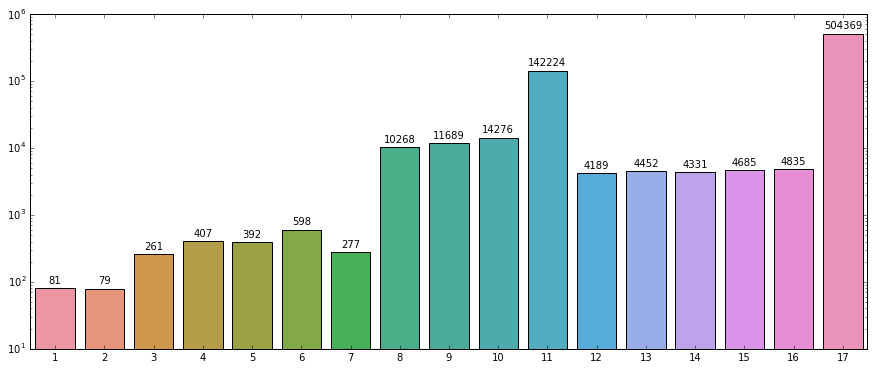

In [53]:
plt.figure(figsize=(15, 6))
sns.barplot(list(record_per_customer[0]), list(record_per_customer[1]))
plt.yscale('log')
for i, count in enumerate(record_per_customer[1]):
    plt.text(i, count*1.1, count, ha='center', va='bottom')

In [107]:
all_records = df_copy.ncodpers.value_counts().index

In [108]:
first_records = {}

for i in range(17):
    first_records[i+1] = df_copy.ncodpers.value_counts().index[np.unique(df_copy.ncodpers.value_counts().values,
                                                                         return_index=True)[1][i]]
first_records #Primer código de cada cantidad de registros

{1: 1436222,
 2: 1448662,
 3: 1453399,
 4: 71626,
 5: 1261738,
 6: 772296,
 7: 330325,
 8: 1443663,
 9: 1438061,
 10: 1407339,
 11: 1295587,
 12: 1401136,
 13: 1396666,
 14: 1393805,
 15: 1383867,
 16: 1378056,
 17: 32752}

In [109]:
l_records = {} #los indices según la cantidad que hay de cada uno
for i in np.unique(df_copy.ncodpers.value_counts().values, return_index=True)[0]:
    if i == 1:
        l_records[i] = all_records[np.where(all_records==first_records[1])[0][0]:]
    else:        
        l_records[i] = all_records[np.where(all_records==first_records[i])[0][0]:np.where(all_records==first_records[i-1])[0][0]]

* Se borraron los clientes que sólo tienen un registro

In [118]:
df_copy.shape

(10795392, 27)

In [119]:
only_record = df_copy.loc[df_copy['ncodpers'].isin(l_records[1])].sort_values(['ncodpers', 'fecha_dato']).index
df_copy.drop(only_record, inplace=True)
df_copy.shape

(10795311, 27)

In [121]:
group_ncodpers = df_copy.groupby('ncodpers')
group_fecha = df_copy.groupby('fecha_dato')

* Se hace un nuevo dataset en el que se emparejan los registros de cada cliente con el siguiente label p+1

In [244]:
"""start = time()
df_new = pd.DataFrame()
lista = list(group_ncodpers.groups.keys())
for code in lista:
    df_aux = group_ncodpers.get_group(code) #DF con los registros de un código
    
    df_aux1 = df_aux.iloc[:-1] #Se obtienen los registros menos el último
    
    df_aux_target = df_target.iloc[df_aux.index].iloc[1:] #Se obtienen los targets desde el segundo en adelante
    df_aux_target.set_index(df_aux1.index, inplace=True) #Se actualizan los índices del anterior df con los del aux1
    
    df_aux3 = pd.concat([df_aux1, df_aux_target], axis=1) #Se juntan ambos df resultantes
    
    df_new = df_new.append(df_aux3) #Se concatenan entre sí
end = time()
total_time = end - start

with open("time_new_df.txt", "w") as text_file:
    text_file.write(str(total_time) + ' segundos\n' +
                    str((total_time)/float(60)) + ' minutos\n' +
                    str(total_time/float(3600)) + ' horas.')
print(total_time)"""

0.252730131149292


<h1 style="color:red" >PENDIENTE</h1> 

Hacer el dataset de los 

In [ ]:
start = time()
df_new = pd.DataFrame()

with open("time_by_record.txt", "w") as text_file:
    
    for i in range(2, len(l_records)+1):
        start2 = time()
        lista = l_records[i]
        print(i)
        for code in lista:
            df_aux = group_ncodpers.get_group(code) #DF con los registros de un código

            df_aux1 = df_aux.iloc[:-1] #Se obtienen los registros menos el último

            df_aux_target = df_target.iloc[df_aux.index].iloc[1:] #Se obtienen los targets desde el segundo en adelante
            df_aux_target.set_index(df_aux1.index, inplace=True) #Se actualizan los índices del anterior df con los del aux1

            df_aux3 = pd.concat([df_aux1, df_aux_target], axis=1) #Se juntan ambos df resultantes

            df_new = df_new.append(df_aux3) #Se concatenan entre sí
        end2 = time()
        partial_time = end2 - start2
        text_file.write("Con " + str(i) + " se demoró " + str(partial_time) + " segundos - " + 
                        str((partial_time)/float(60)) + " minutos\n")
end = time()
total_time = end - start

with open("time_new_df.txt", "w") as text_file:
    text_file.write(str(total_time) + ' segundos\n' +
                    str((total_time)/float(60)) + ' minutos\n' +
                    str(total_time/float(3600)) + ' horas.')
print(total_time)

2
3
